In [ ]:
!pip install prophet


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

In [29]:
!pip show prophet


Name: prophet
Version: 1.1.6
Summary: Automatic Forecasting Procedure
Home-page: https://facebook.github.io/prophet/
Author: 
Author-email: "Sean J. Taylor" <sjtz@pm.me>, Ben Letham <bletham@fb.com>
License: MIT
Location: C:\Users\Sangeeta\anaconda3\Lib\site-packages
Requires: cmdstanpy, holidays, importlib-resources, matplotlib, numpy, pandas, tqdm
Required-by: 


In [6]:
chicago_df_1=pd.read_csv(r"C:\Users\Sangeeta\Downloads\P74-Project-3\Project 3\Chicago_Crimes_2001_to_2004.csv",on_bad_lines='skip')
chicago_df_2=pd.read_csv(r"C:\Users\Sangeeta\Downloads\P74-Project-3\Project 3\Chicago_Crimes_2005_to_2007.csv",on_bad_lines='skip')
chicago_df_3=pd.read_csv(r"C:\Users\Sangeeta\Downloads\P74-Project-3\Project 3\Chicago_Crimes_2008_to_2011.csv",on_bad_lines='skip')
chicago_df_4=pd.read_csv(r"C:\Users\Sangeeta\Downloads\P74-Project-3\Project 3\Chicago_Crimes_2012_to_2017.csv",on_bad_lines='skip')

C:\Users\Sangeeta\AppData\Local\Temp\ipykernel_11276\1154360391.py:1: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_df_1=pd.read_csv(r"C:\Users\Sangeeta\Downloads\P74-Project-3\Project 3\Chicago_Crimes_2001_to_2004.csv",on_bad_lines='skip')


In [7]:
chicago_df=pd.concat([chicago_df_2,chicago_df_3,chicago_df_4]) #the bad lines bit removes all the corrupt not correct datatypes 

In [8]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [9]:
#DATA PREPROCESSING-LOOKING FOR THE NULL DATA

In [10]:
chicago_df.isnull().sum().sort_values(ascending=False)


Y Coordinate            74882
Longitude               74882
X Coordinate            74882
Location                74882
Latitude                74882
Location Description     1974
Community Area           1844
Ward                       92
District                   89
Case Number                 7
IUCR                        0
ID                          0
Unnamed: 0                  0
Block                       0
Date                        0
Primary Type                0
Description                 0
Arrest                      0
Domestic                    0
Beat                        0
FBI Code                    0
Year                        0
Updated On                  0
dtype: int64

In [11]:
chicago_df.shape

(6017767, 23)

In [12]:
chicago_df.drop(['Unnamed: 0','X Coordinate', 'Y Coordinate', 'Longitude', 'Latitude', 'Location Description','Ward', 'Community Area', 'FBI Code','District','Case Number'],axis=1, inplace=True)

In [13]:
chicago_df.columns

Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Arrest',
       'Domestic', 'Beat', 'Year', 'Updated On', 'Location'],
      dtype='object')

In [14]:
#DATA ENGINEERING BIT- TO SORT THE DATE OUT

In [15]:
chicago_df.Date=pd.to_datetime(chicago_df.Date,format= '%m/%d/%Y %I:%M:%S %p')

In [16]:
chicago_df

,ID,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,Year,Updated On,Location
0,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,False,1622,2006,04/15/2016 08:55:02 AM,"(41.981912692, -87.771996382)"
1,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,True,False,321,2006,04/15/2016 08:55:02 AM,"(41.775732538, -87.611919814)"
2,4673628,2006-01-08 23:16:00,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,False,False,321,2006,04/15/2016 08:55:02 AM,"(41.769897392, -87.593670899)"
3,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,False,False,1633,2006,04/15/2016 08:55:02 AM,"(41.942984005, -87.780056951)"
4,4673630,2006-02-17 21:03:14,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,True,False,822,2006,04/15/2016 08:55:02 AM,"(41.784210853, -87.71674491)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,10508679,2016-05-03 23:33:00,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,True,True,1034,2016,05/10/2016 03:56:50 PM,"(41.849222028, -87.69155551)"
1456710,10508680,2016-05-03 23:30:00,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,True,True,731,2016,05/10/2016 03:56:50 PM,"(41.760743949, -87.63333531)"
1456711,10508681,2016-05-03 00:15:00,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,False,False,825,2016,05/10/2016 03:56:50 PM,"(41.779234743, -87.685207125)"
1456712,10508690,2016-05-03 21:07:00,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,423,2016,05/10/2016 03:56:50 PM,"(41.745251975, -87.552773464)"


In [17]:
order_data=chicago_df['Primary Type'].value_counts().iloc[:15].index #getting the top 15 samples

In [18]:
order_data

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY',
       'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object', name='Primary Type')

In [22]:
crime_counts = chicago_df.groupby('Primary Type').size()
print(crime_counts)

Primary Type
ARSON                                   9269
ASSAULT                               360244
BATTERY                              1079178
BURGLARY                              369056
CONCEALED CARRY LICENSE VIOLATION         90
CRIM SEXUAL ASSAULT                    22789
CRIMINAL DAMAGE                       702702
CRIMINAL TRESPASS                     171596
DECEPTIVE PRACTICE                    225180
GAMBLING                               14755
HOMICIDE                                5879
HUMAN TRAFFICKING                         28
INTERFERENCE WITH PUBLIC OFFICER       14009
INTIMIDATION                            3324
KIDNAPPING                              4734
LIQUOR LAW VIOLATION                   12129
MOTOR VEHICLE THEFT                   271624
NARCOTICS                             674831
NON - CRIMINAL                            38
NON-CRIMINAL                              96
NON-CRIMINAL (SUBJECT SPECIFIED)           4
OBSCENITY                                4

In [23]:
crime_counts = chicago_df.groupby('Primary Type').size().reset_index(name='Count')
crime_counts = crime_counts.sort_values(by='Count', ascending=False)  # Sort by frequency

print(crime_counts)  # Verify the raw counts

                         Primary Type    Count
32                              THEFT  1245111
2                             BATTERY  1079178
6                     CRIMINAL DAMAGE   702702
17                          NARCOTICS   674831
3                            BURGLARY   369056
24                      OTHER OFFENSE   368169
1                             ASSAULT   360244
16                MOTOR VEHICLE THEFT   271624
29                            ROBBERY   229467
8                  DECEPTIVE PRACTICE   225180
7                   CRIMINAL TRESPASS   171596
25                       PROSTITUTION    60735
33                  WEAPONS VIOLATION    60335
27             PUBLIC PEACE VIOLATION    48403
22         OFFENSE INVOLVING CHILDREN    40260
5                 CRIM SEXUAL ASSAULT    22789
30                        SEX OFFENSE    20172
9                            GAMBLING    14755
12   INTERFERENCE WITH PUBLIC OFFICER    14009
15               LIQUOR LAW VIOLATION    12129
0            

C:\Users\Sangeeta\AppData\Local\Temp\ipykernel_11276\2893401161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


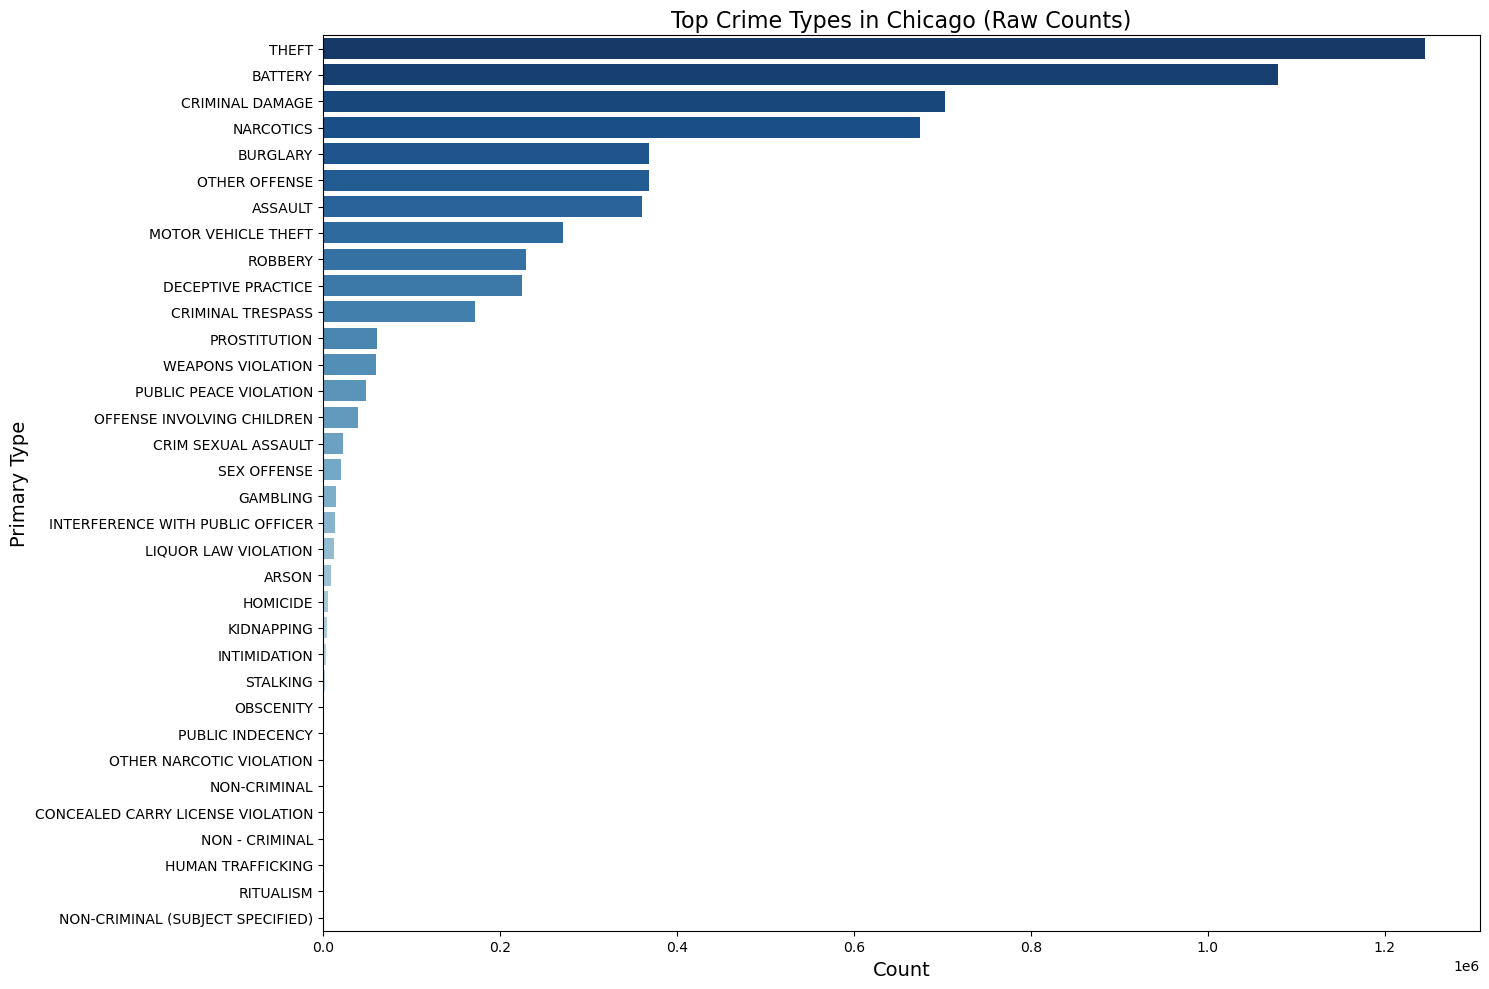

In [24]:
plt.figure(figsize=(15, 10))
sns.barplot(
    y=crime_counts['Primary Type'],
    x=crime_counts['Count'],
    palette="Blues_r"
)
plt.title("Top Crime Types in Chicago (Raw Counts)", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Primary Type", fontsize=14)
plt.tight_layout()
plt.show()


In [26]:
chicago_df.columns

Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Arrest',
       'Domestic', 'Beat', 'Year', 'Updated On', 'Location'],
      dtype='object')

In [28]:
chicago_df['Location']

0          (41.981912692, -87.771996382)
1          (41.775732538, -87.611919814)
2          (41.769897392, -87.593670899)
3          (41.942984005, -87.780056951)
4           (41.784210853, -87.71674491)
                       ...              
1456709     (41.849222028, -87.69155551)
1456710     (41.760743949, -87.63333531)
1456711    (41.779234743, -87.685207125)
1456712    (41.745251975, -87.552773464)
1456713     (41.75830866, -87.620658418)
Name: Location, Length: 6017767, dtype: object

In [31]:
chicago_df.drop(columns='Location',axis=1,inplace=True)

In [32]:
chicago_df.Date=pd.to_datetime(chicago_df.Date,format= '%m/%d/%Y %I:%M:%S %p')

In [33]:
chicago_df.Date

0         2006-04-02 13:00:00
1         2006-02-26 13:40:48
2         2006-01-08 23:16:00
3         2006-04-05 18:45:00
4         2006-02-17 21:03:14
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 6017767, dtype: datetime64[ns]

In [35]:
chicago_df.index=pd.DatetimeIndex(chicago_df.Date)

In [36]:
chicago_df

,ID,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,Year,Updated On
Date,,,,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,False,1622,2006,04/15/2016 08:55:02 AM
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,True,False,321,2006,04/15/2016 08:55:02 AM
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,False,False,321,2006,04/15/2016 08:55:02 AM
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,False,False,1633,2006,04/15/2016 08:55:02 AM
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,True,False,822,2006,04/15/2016 08:55:02 AM
...,...,...,...,...,...,...,...,...,...,...,...
2016-05-03 23:33:00,10508679,2016-05-03 23:33:00,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,True,True,1034,2016,05/10/2016 03:56:50 PM
2016-05-03 23:30:00,10508680,2016-05-03 23:30:00,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,True,True,731,2016,05/10/2016 03:56:50 PM
2016-05-03 00:15:00,10508681,2016-05-03 00:15:00,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,False,False,825,2016,05/10/2016 03:56:50 PM


In [37]:
chicago_df.resample('Y').size()

C:\Users\Sangeeta\AppData\Local\Temp\ipykernel_11276\4227580760.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  chicago_df.resample('Y').size()


Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: YE-DEC, dtype: int64

C:\Users\Sangeeta\AppData\Local\Temp\ipykernel_11276\4053590238.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(chicago_df.resample('Y').size())


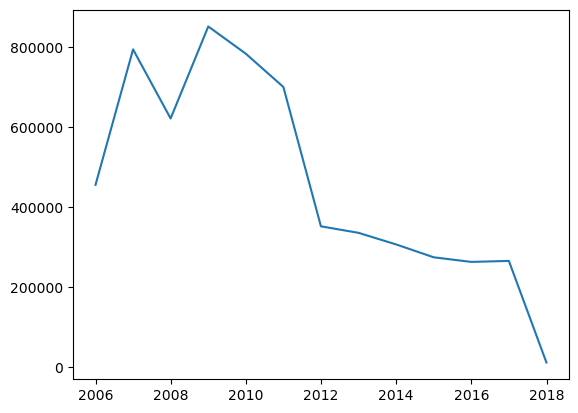

In [40]:
plt.plot(chicago_df.resample('Y').size())

C:\Users\Sangeeta\AppData\Local\Temp\ipykernel_11276\1944994405.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  plt.plot(chicago_df.resample('Q').size())


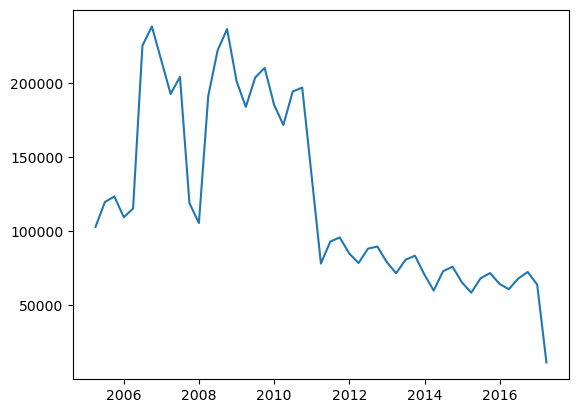

In [42]:
#To do it per quarter
plt.plot(chicago_df.resample('Q').size())

C:\Users\Sangeeta\AppData\Local\Temp\ipykernel_11276\1083121933.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_counts = chicago_df.resample('Q').size()


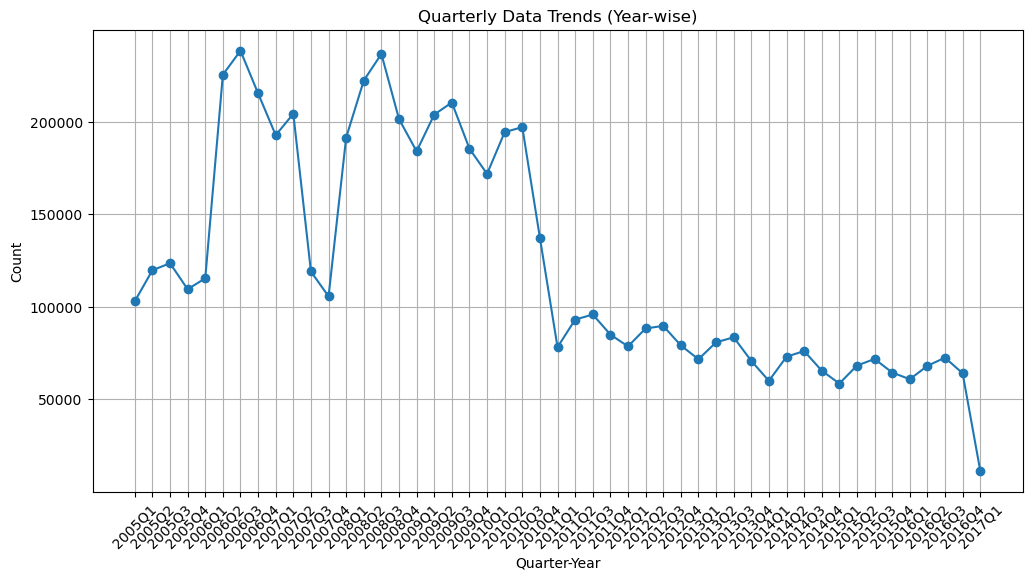

In [43]:
quarterly_counts = chicago_df.resample('Q').size()

# Extracting year and quarter separately for clarity
quarterly_counts.index = quarterly_counts.index.to_period('Q')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(quarterly_counts.index.astype(str), quarterly_counts.values, marker='o', linestyle='-')
plt.xlabel("Quarter-Year")
plt.ylabel("Count")
plt.title("Quarterly Data Trends (Year-wise)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [44]:
chicago_prophet=chicago_df.resample('M').size().reset_index()

C:\Users\Sangeeta\AppData\Local\Temp\ipykernel_11276\2801112032.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  chicago_prophet=chicago_df.resample('M').size().reset_index()


In [45]:
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [46]:
chicago_prophet.columns=['Date','Crime_count']

In [47]:
chicago_prophet

,Date,Crime_count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [49]:
#Modification to make it Date-time to be renamed as ds and y
chicago_prophet_df_final=chicago_prophet.rename(columns={'Date':'ds','Crime_count':'y'})

In [50]:
#MAKE PREDICTIONS

In [51]:
m=Prophet()

In [52]:
m.fit(chicago_prophet_df_final)

15:16:09 - cmdstanpy - INFO - Chain [1] start processing
15:16:12 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)

In [54]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.833000,36750.507140,71660.345586,60454.833000,60454.833000,-4762.390205,-4762.390205,-4762.390205,-4762.390205,-4762.390205,-4762.390205,0.0,0.0,0.0,55692.442795
1,2005-02-28,60322.430432,34079.894379,67613.812598,60322.430432,60322.430432,-9500.517380,-9500.517380,-9500.517380,-9500.517380,-9500.517380,-9500.517380,0.0,0.0,0.0,50821.913052
2,2005-03-31,60175.841875,41340.857476,74762.699629,60175.841875,60175.841875,-1224.147706,-1224.147706,-1224.147706,-1224.147706,-1224.147706,-1224.147706,0.0,0.0,0.0,58951.694169
3,2005-04-30,60033.981981,44070.086740,77891.214431,60033.981981,60033.981981,1182.826674,1182.826674,1182.826674,1182.826674,1182.826674,1182.826674,0.0,0.0,0.0,61216.808655
4,2005-05-31,59887.393424,48298.380584,82253.930016,59887.393424,59887.393424,5498.247091,5498.247091,5498.247091,5498.247091,5498.247091,5498.247091,0.0,0.0,0.0,65385.640515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2018-01-27,10104.391329,-11291.513005,23284.453715,9956.439309,10240.947608,-4977.922716,-4977.922716,-4977.922716,-4977.922716,-4977.922716,-4977.922716,0.0,0.0,0.0,5126.468613
506,2018-01-28,10091.324708,-10766.309844,20764.010768,9942.733049,10229.062149,-4922.570296,-4922.570296,-4922.570296,-4922.570296,-4922.570296,-4922.570296,0.0,0.0,0.0,5168.754412
507,2018-01-29,10078.258087,-11290.222819,22198.950678,9929.026789,10216.754032,-4867.889655,-4867.889655,-4867.889655,-4867.889655,-4867.889655,-4867.889655,0.0,0.0,0.0,5210.368432
508,2018-01-30,10065.191466,-12417.123402,20721.758398,9915.362565,10204.371340,-4816.712501,-4816.712501,-4816.712501,-4816.712501,-4816.712501,-4816.712501,0.0,0.0,0.0,5248.478965


In [55]:
#visualisation of the crime rate

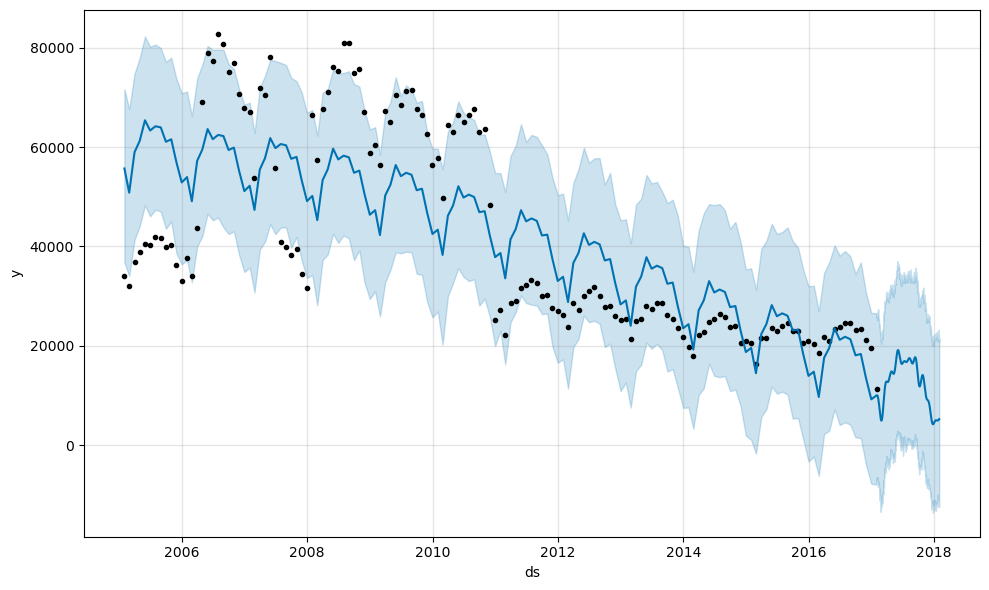

In [56]:
figure=m.plot(forecast)

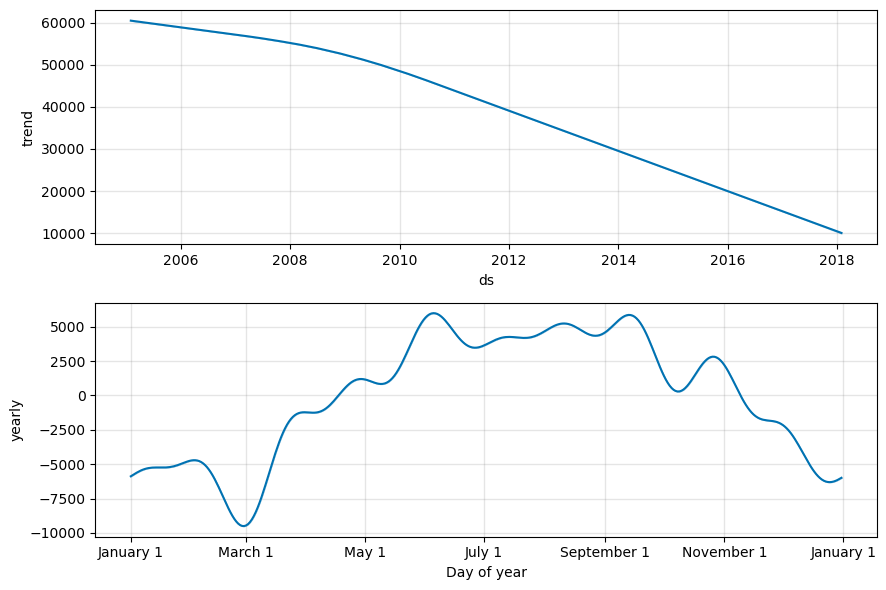

In [58]:
figure=m.plot_components(forecast)

In [63]:
fut=m.make_future_dataframe(periods=1000)

In [64]:
forecast2=m.predict(fut)

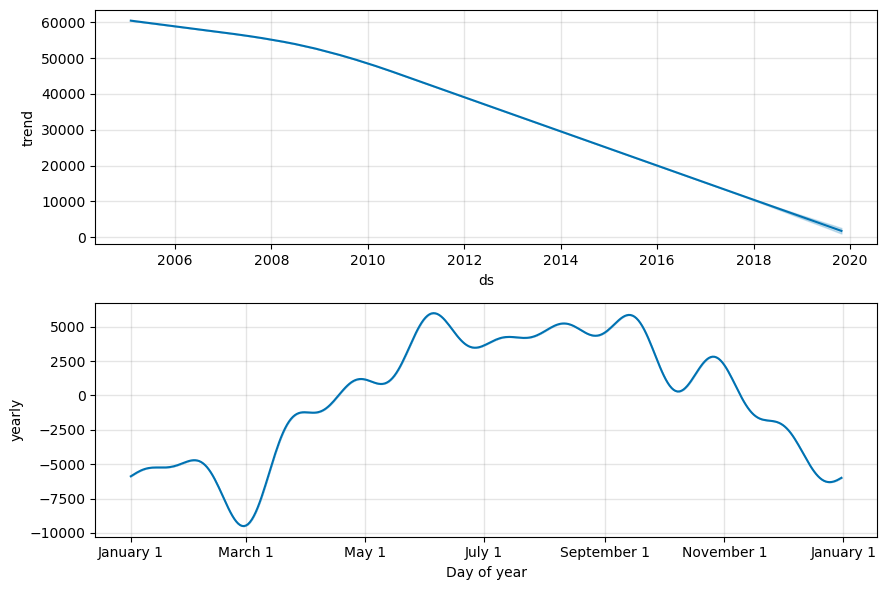

In [65]:
fig=m.plot_components(forecast2)